In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [12]:
data = pd.read_csv('imdb_top_1000.csv')
X = np.array(data.Overview)
data.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [13]:
data = data[['Genre','Overview','Series_Title']]
data.head(10)

,Genre,Overview,Series_Title
0,Drama,Two imprisoned men bond over a number of years...,The Shawshank Redemption
1,"Crime, Drama",An organized crime dynasty's aging patriarch t...,The Godfather
2,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,The Dark Knight
3,"Crime, Drama",The early life and career of Vito Corleone in ...,The Godfather: Part II
4,"Crime, Drama",A jury holdout attempts to prevent a miscarria...,12 Angry Men
5,"Action, Adventure, Drama",Gandalf and Aragorn lead the World of Men agai...,The Lord of the Rings: The Return of the King
6,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",Pulp Fiction
7,"Biography, Drama, History","In German-occupied Poland during World War II,...",Schindler's List
8,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,Inception
9,Drama,An insomniac office worker and a devil-may-car...,Fight Club


In [14]:
data = data.dropna()
text_data = X
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(text_data, show_progress_bar=True)

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

In [15]:
embed_data = embeddings
X = np.array(embed_data)
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(X)
pca_data = pd.DataFrame(pca.transform(X))
pca_data.head()

,0,1,2,3,4
0,2.986182,1.695183,4.334596,-2.355077,2.235807
1,-0.131720,0.887974,4.695488,-2.713966,-1.790712
2,-5.688414,-1.776889,-0.750592,-0.705848,4.124974
3,-1.211428,4.458821,1.582391,-3.536738,-2.343527
4,-0.971368,-2.374326,3.172140,3.073619,-0.171881


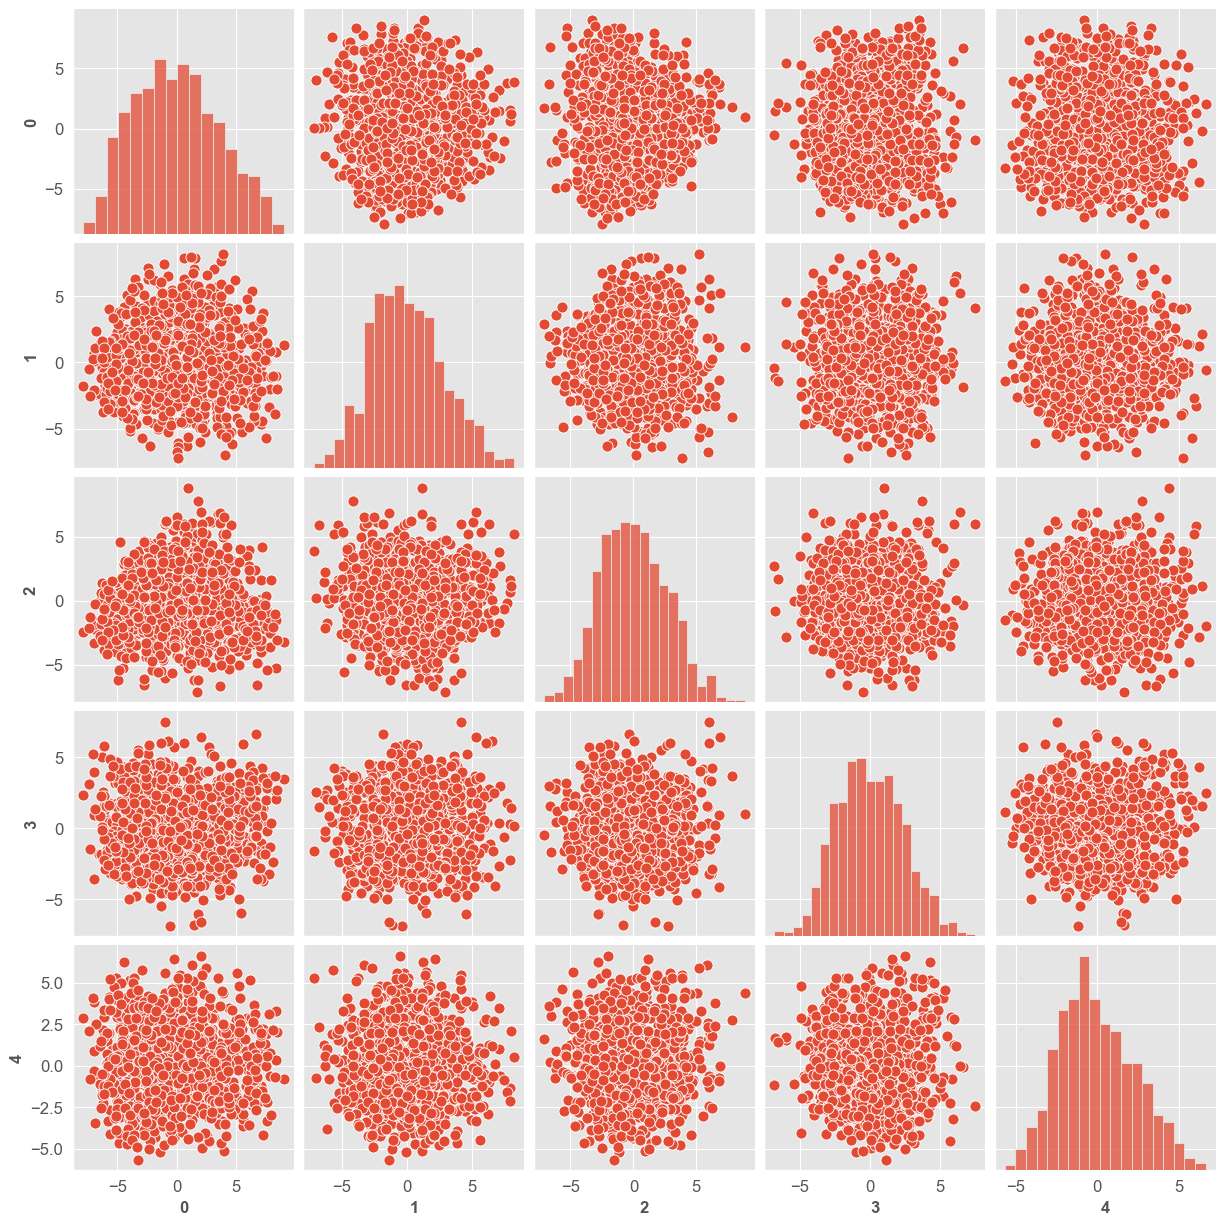

In [16]:
sns.pairplot(pca_data)

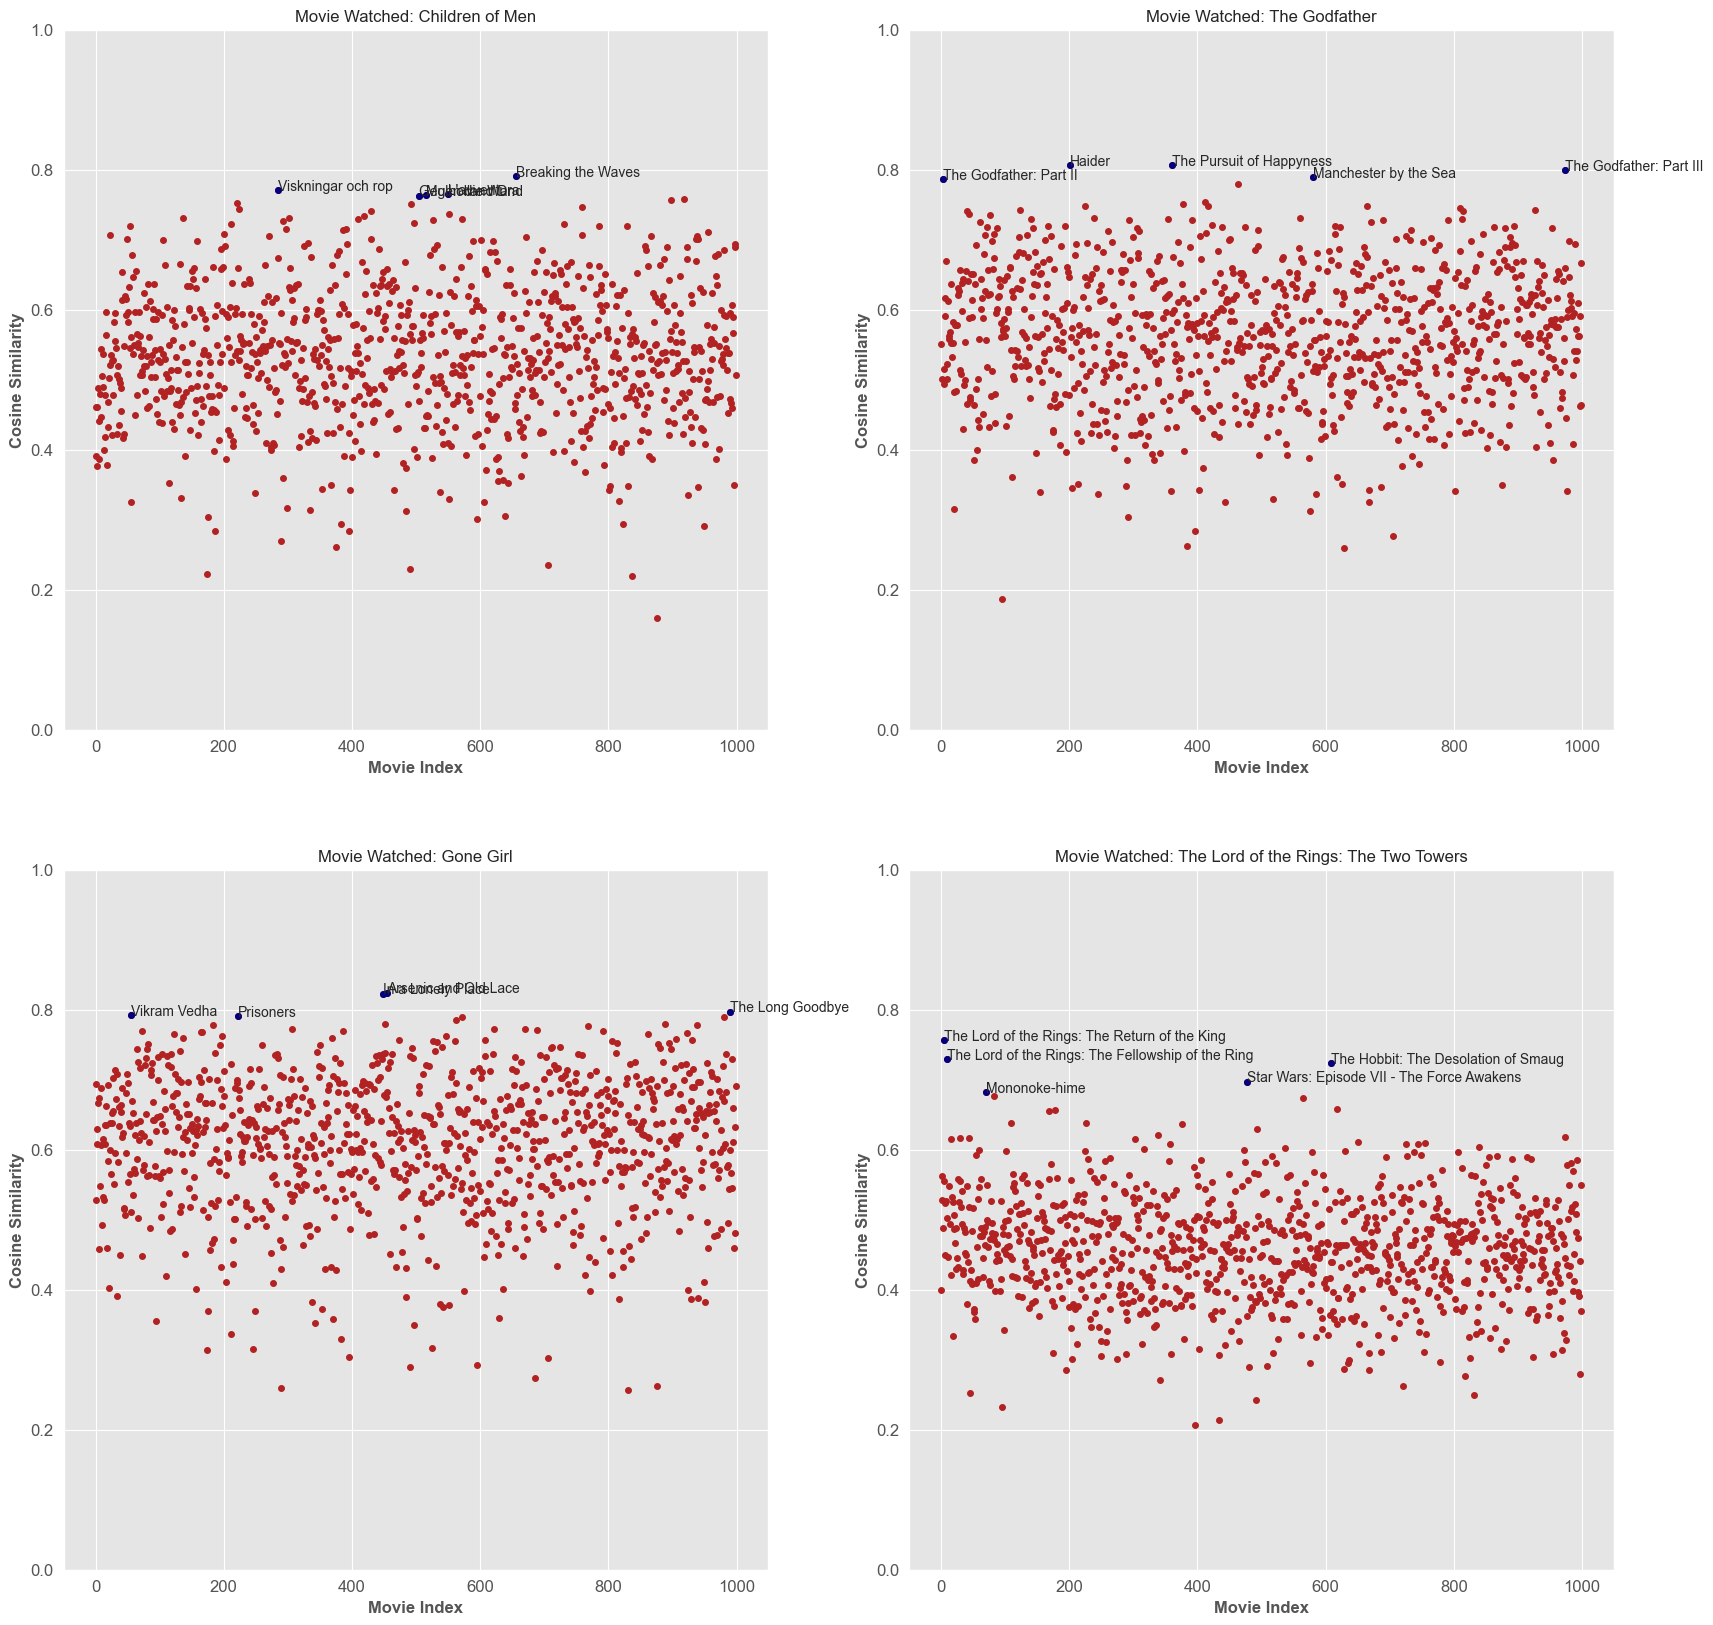

In [17]:
cos_sim_data = pd.DataFrame(cosine_similarity(X))
def give_recommendations(index,print_recommendation = False,print_recommendation_plots= False,print_genres =False):
  index_recomm =cos_sim_data.loc[index].sort_values(ascending=False).index.tolist()[1:6]
  movies_recomm =  data['Series_Title'].loc[index_recomm].values
  result = {'Movies':movies_recomm,'Index':index_recomm}
  if print_recommendation:
    print('The watched movie is this one: %s \n'%(data['Series_Title'].loc[index]))
    k=1
    for movie in movies_recomm:
      print('The number %i recommended movie is this one: %s \n'%(k,movie))
  if print_recommendation_plots:
    print('The plot of the watched movie is this one:\n %s \n'%(data['Overview'].loc[index]))
    k=1
    for q in range(len(movies_recomm)):
      plot_q = data['Overview'].loc[index_recomm[q]]
      print('The plot of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
      k=k+1
  if print_genres:
    print('The genres of the watched movie is this one:\n %s \n'%(data['Genre'].loc[index]))
    k=1
    for q in range(len(movies_recomm)):
      plot_q = data['Genre'].loc[index_recomm[q]]
      print('The plot of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
      k=k+1
  return result


plt.figure(figsize=(20,20))
for q in range(1,5):
  plt.subplot(2,2,q)
  index = np.random.choice(np.arange(0,len(X)))
  to_plot_data = cos_sim_data.drop(index,axis=1)
  plt.plot(to_plot_data.loc[index],'.',color='firebrick')
  recomm_index = give_recommendations(index)
  x = recomm_index['Index']
  y = cos_sim_data.loc[index][x].tolist()
  m = recomm_index['Movies']
  plt.plot(x,y,'.',color='navy',label='Recommended Movies')
  plt.title('Movie Watched: '+data['Series_Title'].loc[index])
  plt.xlabel('Movie Index')
  k=0
  for x_i in x:
    plt.annotate('%s'%(m[k]),(x_i,y[k]),fontsize=10)
    k=k+1

  plt.ylabel('Cosine Similarity')
  plt.ylim(0,1)

In [18]:
give_recommendations(2,True)

The watched movie is this one: The Dark Knight 

The number 1 recommended movie is this one: Joker 

The number 1 recommended movie is this one: Dirty Harry 

The number 1 recommended movie is this one: Batman Begins 

The number 1 recommended movie is this one: Guardians of the Galaxy 

The number 1 recommended movie is this one: Death Note: Desu nôto 



{'Movies': array(['Joker', 'Dirty Harry', 'Batman Begins', 'Guardians of the Galaxy',
        'Death Note: Desu nôto'], dtype=object),
 'Index': [33, 853, 155, 339, 762]}

In [19]:
give_recommendations(2,False,True)

The plot of the watched movie is this one:
 When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice. 

The plot of the number 1 recommended movie is this one:
 In Gotham City, mentally troubled comedian Arthur Fleck is disregarded and mistreated by society. He then embarks on a downward spiral of revolution and bloody crime. This path brings him face-to-face with his alter-ego: the Joker. 

The plot of the number 2 recommended movie is this one:
 When a madman calling himself "the Scorpio Killer" menaces the city, tough-as-nails San Francisco Police Inspector "Dirty" Harry Callahan is assigned to track down and ferret out the crazed psychopath. 

The plot of the number 3 recommended movie is this one:
 After training with his mentor, Batman begins his fight to free crime-ridden Gotham City from corruption. 

The plot of the number 4 recommended movie is t

{'Movies': array(['Joker', 'Dirty Harry', 'Batman Begins', 'Guardians of the Galaxy',
        'Death Note: Desu nôto'], dtype=object),
 'Index': [33, 853, 155, 339, 762]}

In [20]:
give_recommendations(10,True,True)

The watched movie is this one: The Lord of the Rings: The Fellowship of the Ring 

The number 1 recommended movie is this one: The Lord of the Rings: The Return of the King 

The number 1 recommended movie is this one: Harry Potter and the Deathly Hallows: Part 2 

The number 1 recommended movie is this one: The Hobbit: An Unexpected Journey 

The number 1 recommended movie is this one: Star Wars: Episode VII - The Force Awakens 

The number 1 recommended movie is this one: The Hobbit: The Desolation of Smaug 

The plot of the watched movie is this one:
 A meek Hobbit from the Shire and eight companions set out on a journey to destroy the powerful One Ring and save Middle-earth from the Dark Lord Sauron. 

The plot of the number 1 recommended movie is this one:
 Gandalf and Aragorn lead the World of Men against Sauron's army to draw his gaze from Frodo and Sam as they approach Mount Doom with the One Ring. 

The plot of the number 2 recommended movie is this one:
 Harry, Ron, and Hermi

{'Movies': array(['The Lord of the Rings: The Return of the King',
        'Harry Potter and the Deathly Hallows: Part 2',
        'The Hobbit: An Unexpected Journey',
        'Star Wars: Episode VII - The Force Awakens',
        'The Hobbit: The Desolation of Smaug'], dtype=object),
 'Index': [5, 226, 618, 477, 609]}

In [21]:
recomm_list = []
for i in range(len(X)):
  recomm_i = give_recommendations(i)
  recomm_list.append(recomm_i['Movies'])
recomm_data = pd.DataFrame(recomm_list,columns=['First Recommendation','Second Recommendation','Third Recommendation','Fourth Recommendation','Fifth Recommendation'])
recomm_data['Watched Movie'] = data['Series_Title']
recomm_data = recomm_data[['Watched Movie','First Recommendation','Second Recommendation','Third Recommendation','Fourth Recommendation','Fifth Recommendation']]

In [22]:
recomm_data.sample(frac=1).head()

,Watched Movie,First Recommendation,Second Recommendation,Third Recommendation,Fourth Recommendation,Fifth Recommendation
258,Dilwale Dulhania Le Jayenge,La La Land,The Broken Circle Breakdown,The Red Shoes,About Time,Breakfast at Tiffany's
640,Les triplettes de Belleville,Song of the Sea,Taken,Spoorloos,The Muppet Movie,Ôkami kodomo no Ame to Yuki
755,Harry Potter and the Deathly Hallows: Part 1,Jûbê ninpûchô,Harry Potter and the Deathly Hallows: Part 2,Guardians of the Galaxy,Rupan sansei: Kariosutoro no shiro,The Avengers
521,Trois couleurs: Bleu,The Graduate,Changeling,Kal Ho Naa Ho,Jodaeiye Nader az Simin,Breaking the Waves
727,What We Do in the Shadows,Taxi Driver,Sherlock Jr.,The Ladykillers,Captain America: The Winter Soldier,District 9


In [23]:
give_recommendations(623,True,True)

The watched movie is this one: Avatar 

The number 1 recommended movie is this one: Blade Runner 

The number 1 recommended movie is this one: Star Trek 

The number 1 recommended movie is this one: The Martian 

The number 1 recommended movie is this one: Aliens 

The number 1 recommended movie is this one: PK 

The plot of the watched movie is this one:
 A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and protecting the world he feels is his home. 

The plot of the number 1 recommended movie is this one:
 A blade runner must pursue and terminate four replicants who stole a ship in space, and have returned to Earth to find their creator. 

The plot of the number 2 recommended movie is this one:
 The brash James T. Kirk tries to live up to his father's legacy with Mr. Spock keeping him in check as a vengeful Romulan from the future creates black holes to destroy the Federation one planet at a time. 

The plot of the numbe

{'Movies': array(['Blade Runner', 'Star Trek', 'The Martian', 'Aliens', 'PK'],
       dtype=object),
 'Index': [275, 493, 329, 106, 207]}